In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import math

<h1>PyTorch Tutorial 03 - Gradient Calculation With Autograd</h1>

In [2]:
x = torch.randn(3, requires_grad=True)
# print(x)

y = x + 2
# print(y)

z = y * y * 2
z = z.mean()
# print(z)

z.backward() # dz/dx
print(x.grad)

tensor([ 3.0709,  3.4505, -0.3221])


The .backward will create a vector-jacobian product in the backgraound (J*v = x.grad). This means that .backward is
okay with no input if z is a scalar, but it needs a vector as input if z is not, example below.

In [3]:
z = y * y * 2
print(z)

v = torch.tensor([0.1, 1.0, 0.001], dtype=torch.float32)
z.backward(v) # if z is a 
print(x.grad)

tensor([10.6096, 13.3944,  0.1167], grad_fn=<MulBackward0>)
tensor([ 3.9922, 13.8021, -0.3231])


In [4]:
x = torch.randn(3, requires_grad=True)
print(x)
# Tree ways to prevent tracking the gradiant.
# x.requires_grad_(False)
# print(x)
# y = x.detach()
# print(y)
# with torch.no_grad():
#   y = x + 2
#   print(y)

tensor([-0.2734,  0.4469,  0.5170], requires_grad=True)


In [5]:
weights = torch.ones(4, requires_grad=True)

for epoch in range(3):
  model_output = (weights*3).sum()
  model_output.backward()
  print(weights.grad)

  weights.grad.zero_()

tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])


In [6]:
weights = torch.ones(4, requires_grad=True)
optimizer = torch.optim.SGD( weights, lr=0.01 )
optimizer.step()
optimizer.zero_grad()

TypeError: params argument given to the optimizer should be an iterable of Tensors or dicts, but got torch.FloatTensor

<h1>PyTorch Tutorial 04 - Backpropagation - Theory With Example</h1>

In [ ]:
x = torch.tensor(1.0)
y = torch.tensor(2.0)
w = torch.tensor(1.0, requires_grad=True)

# forward pass and compute the loss
y_hat = w * x
loss = (y_hat - y)**2
print(loss)

# backwards pass
loss.backward()
print(w.grad)

### update weights 
### next forward and backward


tensor(1., grad_fn=<PowBackward0>)
tensor(-2.)


<h1>PyTorch Tutorial 05 - Gradient Descent with Autograd and Backpropagation</h1>

In [ ]:
# f = w * x

# f = 2 * x
X = np.array([1, 2, 3, 4], dtype=np.float32)
Y = np.array([2, 4, 6, 8], dtype=np.float32)

w = 0.0

# model prediction
def forward(x):
  return w * x

# loss = MSE
def loss(y, y_predicted):
  return ((y_predicted - y)**2).mean()

# gradient
# MSE = 1/N * (w*x - y)**2
# dMSE/dw = 1/N 2x (w*x - y)
def gradient(x, y, y_predicted):
  return np.dot(2*x, y_predicted - y).mean()

print(f'Prediction before traning: f(5) = {forward(5):.3f}')

# Traning
learning_rate = 0.01
n_inters = 20

for epoch in range(n_inters):
  # prediction = forward pass
  y_pred = forward(X)

  # loss
  l = loss(Y, y_pred)

  # gradiants
  dw = gradient(X, Y, y_pred)

  # update weights
  w -= learning_rate * dw

  if epoch % 2 == 0:
    print(f'epoch {epoch + 1}: w = {w:.3f}, loss = {l:.8f}')

print(f'Prediction after traning: f(5) = {forward(5):.3f}')



Prediction before traning: f(5) = 0.000
epoch 1: w = 1.200, loss = 30.00000000
epoch 3: w = 1.872, loss = 0.76800019
epoch 5: w = 1.980, loss = 0.01966083
epoch 7: w = 1.997, loss = 0.00050331
epoch 9: w = 1.999, loss = 0.00001288
epoch 11: w = 2.000, loss = 0.00000033
epoch 13: w = 2.000, loss = 0.00000001
epoch 15: w = 2.000, loss = 0.00000000
epoch 17: w = 2.000, loss = 0.00000000
epoch 19: w = 2.000, loss = 0.00000000
Prediction after traning: f(5) = 10.000


In [ ]:
# f = w * x

# f = 2 * x
X = torch.tensor([1, 2, 3, 4], dtype=torch.float32)
Y = torch.tensor([2, 4, 6, 8], dtype=torch.float32)

w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

# model prediction
def forward(x):
  return w * x

# loss = MSE
def loss(y, y_predicted):
  return ((y_predicted - y)**2).mean()

print(f'Prediction before traning: f(5) = {forward(5):.3f}')

# Traning
learning_rate = 0.01
n_inters = 100

for epoch in range(n_inters):
  # prediction = forward pass
  y_pred = forward(X)

  # loss
  l = loss(Y, y_pred)

  # gradiants = backward pass
  l.backward() # dl/dw

  # update weights
  with torch.no_grad():
    w -= learning_rate * w.grad

  # zero gradiants
  w.grad.zero_()

  if epoch % 10 == 0:
    print(f'epoch {epoch + 1}: w = {w:.3f}, loss = {l:.8f}')

print(f'Prediction after traning: f(5) = {forward(5):.3f}')

Prediction before traning: f(5) = 0.000
epoch 1: w = 0.300, loss = 30.00000000
epoch 11: w = 1.665, loss = 1.16278565
epoch 21: w = 1.934, loss = 0.04506890
epoch 31: w = 1.987, loss = 0.00174685
epoch 41: w = 1.997, loss = 0.00006770
epoch 51: w = 1.999, loss = 0.00000262
epoch 61: w = 2.000, loss = 0.00000010
epoch 71: w = 2.000, loss = 0.00000000
epoch 81: w = 2.000, loss = 0.00000000
epoch 91: w = 2.000, loss = 0.00000000
Prediction after traning: f(5) = 10.000


The backward is not as exact as the numeriacal gradiant.

<h1>PyTorch Tutorial 06 - Training Pipeline: Model, Loss, and Optimizer</h1>

In [ ]:
# f = w * x

# f = 2 * x
X = torch.tensor([1, 2, 3, 4], dtype=torch.float32)
Y = torch.tensor([2, 4, 6, 8], dtype=torch.float32)

w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

# model prediction
def forward(x):
  return w * x

print(f'Prediction before traning: f(5) = {forward(5):.3f}')

# Traning
learning_rate = 0.01
n_inters = 100

loss = nn.MSELoss()
optimizer = torch.optim.SGD([w], lr=learning_rate) #SGD = stocastic gradiant decent

for epoch in range(n_inters):
  # prediction = forward pass
  y_pred = forward(X)

  # loss
  l = loss(Y, y_pred)

  # gradiants = backward pass
  l.backward() # dl/dw

  # update weights
  optimizer.step()

  # zero gradiants
  optimizer.zero_grad()

  if epoch % 10 == 0:
    print(f'epoch {epoch + 1}: w = {w:.3f}, loss = {l:.8f}')

print(f'Prediction after traning: f(5) = {forward(5):.3f}')

Prediction before traning: f(5) = 0.000
epoch 1: w = 0.300, loss = 30.00000000
epoch 11: w = 1.665, loss = 1.16278565
epoch 21: w = 1.934, loss = 0.04506890
epoch 31: w = 1.987, loss = 0.00174685
epoch 41: w = 1.997, loss = 0.00006770
epoch 51: w = 1.999, loss = 0.00000262
epoch 61: w = 2.000, loss = 0.00000010
epoch 71: w = 2.000, loss = 0.00000000
epoch 81: w = 2.000, loss = 0.00000000
epoch 91: w = 2.000, loss = 0.00000000
Prediction after traning: f(5) = 10.000


In [ ]:
# f = w * x

# f = 2 * x
X = torch.tensor([[1], [2], [3], [4]], dtype=torch.float32)
Y = torch.tensor([[2], [4], [6], [8]], dtype=torch.float32)

X_test = torch.tensor([5], dtype=torch.float32)
n_samples, n_features = X.shape
print(n_samples, n_features)

input_size = n_features
out_size = n_features

model = nn.Linear(input_size, out_size)

# Costum model
class LinearRegrassion(nn.Module):
  def __init__(self, input_dim, output_dim):
    super(LinearRegrassion, self).__init__()
    # define layers
    self.lin = nn.Linear(input_dim, output_dim)
  
  def forward(self, x):
    return self.lin(x)

# model = LinearRegrassion(input_size, out_size)

print(f'Prediction before traning: f(5) = {model(X_test).item():.3f}')

# Traning
learning_rate = 0.01
n_inters = 100

loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate) #SGD = stocastic gradiant decent

for epoch in range(n_inters):
  # prediction = forward pass
  y_pred = model(X)

  # loss
  l = loss(Y, y_pred)

  # gradiants = backward pass
  l.backward() # dl/dw

  # update weights
  optimizer.step()

  # zero gradiants
  optimizer.zero_grad()

  if epoch % 10 == 0:
    [w, b] = model.parameters()
    print(f'epoch {epoch + 1}: w = {w[0][0].item():.3f}, loss = {l:.8f}')

print(f'Prediction after traning: f(5) = {model(X_test).item():.3f}')

4 1
Prediction before traning: f(5) = 4.327
epoch 1: w = 1.058, loss = 9.88688183
epoch 11: w = 1.780, loss = 0.26534331
epoch 21: w = 1.898, loss = 0.01585601
epoch 31: w = 1.919, loss = 0.00887779
epoch 41: w = 1.924, loss = 0.00820440
epoch 51: w = 1.927, loss = 0.00772281
epoch 61: w = 1.929, loss = 0.00727321
epoch 71: w = 1.931, loss = 0.00684985
epoch 81: w = 1.933, loss = 0.00645116
epoch 91: w = 1.935, loss = 0.00607566
Prediction after traning: f(5) = 9.870


<h1>PyTorch Tutorial 07 - Linear Regression</h1>

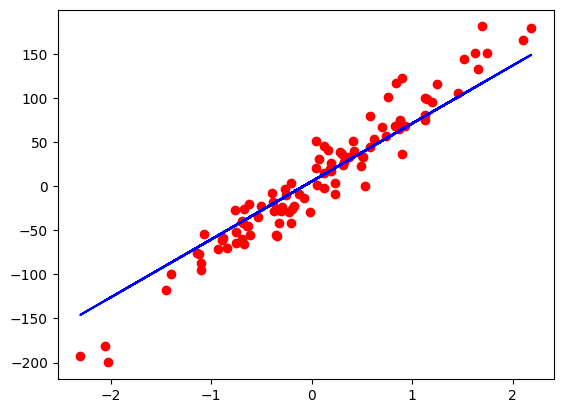

In [ ]:

# 0) prepare data
x_np, y_np = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)

x = torch.from_numpy(x_np.astype(np.float32))
y = torch.from_numpy(y_np.astype(np.float32))
y = y.view(y.shape[0], 1)

n_samples, n_features = x.shape

# 1) model
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

# 2) loss and optimizer
learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# 3) training loop
num_epochs = 100
for epoch in range(num_epochs):
  # forward pass and loss
  y_pred = model(x)
  loss = criterion(y_pred, y)

  # backward pass
  loss.backward()

  # update
  optimizer.step()

  # empty gradients
  optimizer.zero_grad()

if epoch+1 % 10 == 0:
  print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

# plot
predicted = model(x).detach().numpy()
plt.plot(x_np, y_np, 'ro')
plt.plot(x_np, predicted, 'b')
plt.show()


<h1>PyTorch Tutorial 08 - Logistic Regression</h1>

In [ ]:
# 0) prepare data
bc = datasets.load_breast_cancer()
x, y = bc.data, bc.target

n_samples, n_features = x.shape

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1234)

# scale
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

x_train = torch.from_numpy(x_train.astype(np.float32))
x_test = torch.from_numpy(x_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

y_train = y_train.view(y_train.shape[0], 1)
y_test = y_test.view(y_test.shape[0], 1)

# 1) model
# f = wx + b, sigmoid at the end
class LogisticRegression(nn.Module):
  def __init__(self, n_input_features):
    super(LogisticRegression, self).__init__()
    self.linear = nn.Linear(n_input_features, 1)
  
  def forward(self, x):
    y_pred = torch.sigmoid(self.linear(x))
    return y_pred

model = LogisticRegression(n_features)


# 2) loss and optimizer
learning_rate = 0.01
criterion = nn.BCELoss() # Binary cross entropy loss
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# 3) training loop
num_epochs = 100
for epoch in range(num_epochs):
  # forward pass and loss
  y_pred = model(x_train)
  loss = criterion(y_pred, y_train)

  # backward pass
  loss.backward()

  # update
  optimizer.step()

  # empty gradients
  optimizer.zero_grad()

  if epoch % 10 == 0:
    print(f'epoch: {epoch}, loss = {loss.item():.4f}')

with torch.no_grad():
  y_pred = model(x_test)
  y_pred_cls = y_pred.round()
  acc = y_pred_cls.eq(y_test).sum() / float(y_test.shape[0])
  print(f'accuracy = {acc:.4f}')


epoch: 1, loss = 0.7603
epoch: 11, loss = 0.5801
epoch: 21, loss = 0.4768
epoch: 31, loss = 0.4114
epoch: 41, loss = 0.3664
epoch: 51, loss = 0.3333
epoch: 61, loss = 0.3079
epoch: 71, loss = 0.2876
epoch: 81, loss = 0.2709
epoch: 91, loss = 0.2570
accuracy = 0.8947


<h1>PyTorch Tutorial 09 - Dataset and DataLoader - Batch Training</h1>

In [ ]:

class WineDataset(Dataset):

    def __init__(self):
        # Initialize data, download, etc.
        # read with numpy or pandas
        xy = np.loadtxt('./data/wineData.csv', delimiter=',', dtype=np.float32, skiprows=1)
        self.n_samples = xy.shape[0]

        # here the first column is the class label, the rest are the features
        self.x_data = torch.from_numpy(xy[:, 1:]) # size [n_samples, n_features]
        self.y_data = torch.from_numpy(xy[:, [0]]) # size [n_samples, 1]

    # support indexing such that dataset[i] can be used to get i-th sample
    def __getitem__(self, index):
        return self.x_data[index], self.y_data[index]

    # we can call len(dataset) to return the size
    def __len__(self):
        return self.n_samples


# create dataset
dataset = WineDataset()

# get first sample and unpack
# first_data = dataset[0]
# features, labels = first_data
# print(features, labels)
dataLoader = DataLoader(dataset=dataset, batch_size=4, shuffle=True, num_workers=2) # num_workers = makes loading falser, is uses multiple subprocesses 

# dataiter = iter(dataLoader)
# data = dataiter.next()
# features, labels = data
# print(features, labels)

# traning loop
num_epoch = 2
total_samples = len(dataset)
n_iterations = math.ceil(total_samples/4)
print(total_samples, n_iterations)

for epoch in range(num_epoch):
  for i, (input, labels) in enumerate(dataLoader):
    # dorward backward, update
    if i %5 == 0:
      print(f'epoch {epoch+1}/{num_epoch}, step {i}/{n_iterations}, input {input.shape}')

# torchvision.datasets.MNIST()
# fasion-mnist, cifar, coco


178 45
epoch 1/2, step 0/45, input torch.Size([4, 13])
epoch 1/2, step 5/45, input torch.Size([4, 13])
epoch 1/2, step 10/45, input torch.Size([4, 13])
epoch 1/2, step 15/45, input torch.Size([4, 13])
epoch 1/2, step 20/45, input torch.Size([4, 13])
epoch 1/2, step 25/45, input torch.Size([4, 13])
epoch 1/2, step 30/45, input torch.Size([4, 13])
epoch 1/2, step 35/45, input torch.Size([4, 13])
epoch 1/2, step 40/45, input torch.Size([4, 13])
epoch 2/2, step 0/45, input torch.Size([4, 13])
epoch 2/2, step 5/45, input torch.Size([4, 13])
epoch 2/2, step 10/45, input torch.Size([4, 13])
epoch 2/2, step 15/45, input torch.Size([4, 13])
epoch 2/2, step 20/45, input torch.Size([4, 13])
epoch 2/2, step 25/45, input torch.Size([4, 13])
epoch 2/2, step 30/45, input torch.Size([4, 13])
epoch 2/2, step 35/45, input torch.Size([4, 13])
epoch 2/2, step 40/45, input torch.Size([4, 13])


<h1>PyTorch Tutorial 10 - Dataset Transforms</h1>

In [ ]:
# dataset = torchvision.datasets.MNIST( root='./data', transform=torchvision.transforms.ToTenser() )
class WineDataset(Dataset):

    def __init__(self, transform=None):
        # Initialize data, download, etc.
        # read with numpy or pandas
        xy = np.loadtxt('./data/wineData.csv', delimiter=',', dtype=np.float32, skiprows=1)
        self.n_samples = xy.shape[0]

        # here the first column is the class label, the rest are the features
        self.x_data = xy[:, 1:] # size [n_samples, n_features]
        self.y_data = xy[:, [0]] # size [n_samples, 1]

        self.transform = transform

    # support indexing such that dataset[i] can be used to get i-th sample
    def __getitem__(self, index):
        sample = self.x_data[index], self.y_data[index]

        if self.transform:
            sample = self.transform(sample)
        
        return sample

    # we can call len(dataset) to return the size
    def __len__(self):
        return self.n_samples

class ToTensor:
    def __call__(self, sample):
        inputs, targest = sample
        return torch.from_numpy(inputs), torch.from_numpy(targest)

class MulTransform():
    def __init__(self, factor):
        self.factor = factor
    
    def __call__(self, sample):
        inputs, target = sample
        inputs = input * self.factor
        return inputs, target

# create dataset
dataset = WineDataset(transform=ToTensor())
first_data = dataset[0]
features, labels = first_data
print(features)
print(type(features), type(labels))

composed = torchvision.transforms.Compose([ToTensor(), MulTransform(4)])
dataset = WineDataset(transform=composed)
first_data = dataset[0]
features, labels = first_data
print(features)
print(type(features), type(labels))


tensor([1.4230e+01, 1.7100e+00, 2.4300e+00, 1.5600e+01, 1.2700e+02, 2.8000e+00,
        3.0600e+00, 2.8000e-01, 2.2900e+00, 5.6400e+00, 1.0400e+00, 3.9200e+00,
        1.0650e+03])
<class 'torch.Tensor'> <class 'torch.Tensor'>
tensor([[5.1080e+01, 1.3720e+01, 7.9200e+00, 6.4000e+01, 3.2000e+02, 6.5200e+00,
         5.0000e+00, 1.7200e+00, 3.3200e+00, 1.3600e+01, 2.8000e+00, 8.4800e+00,
         1.4880e+03],
        [4.6480e+01, 7.9600e+00, 9.1200e+00, 7.2000e+01, 3.9200e+02, 1.2080e+01,
         9.0400e+00, 6.8000e-01, 5.4000e+00, 1.3000e+01, 4.6400e+00, 1.1840e+01,
         1.3800e+03]])
<class 'torch.Tensor'> <class 'torch.Tensor'>


<h1>PyTorch Tutorial 11 - Softmax and Cross Entropy</h1>

<h3>Softmax</h3>

In [ ]:
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=0)

x = np.array([2, 1, 0.1])
outputs = softmax(x)
print(outputs)

x = torch.tensor([2, 1, 0.1])
outputs = torch.softmax(x, dim=0)
print(outputs)



[0.65900114 0.24243297 0.09856589]
tensor([0.6590, 0.2424, 0.0986])


<h3>Cross Entropy</h3>

In [ ]:
def cross_entropy(actual, predicted):
    EPS = 1e-15
    predicted = np.clip(predicted, EPS, 1 - EPS)
    loss = -np.sum(actual * np.log(predicted))
    return loss # / float(predicted.shape[0])

# y must be one hot encoded
# if class 0: [1 0 0]
# if class 1: [0 1 0]
# if class 2: [0 0 1]
Y = np.array([1, 0, 0])
Y_pred_good = np.array([0.7, 0.2, 0.1])
Y_pred_bad = np.array([0.1, 0.3, 0.6])
l1 = cross_entropy(Y, Y_pred_good)
l2 = cross_entropy(Y, Y_pred_bad)
print(f'Loss1 numpy: {l1:.4f}')
print(f'Loss2 numpy: {l2:.4f}')



Loss1 numpy: 0.3567
Loss2 numpy: 2.3026


In torch

In [ ]:
loss = nn.CrossEntropyLoss()

# 3 samples
y = torch.tensor([2, 0, 1])

# size = n_samples * n_classes = 3*3
y_pred_good = torch.tensor([[0.01, 1.0, 2.1], [2.0, 1.0, 0.1], [0.1, 3.0, 0.1]])
y_pred_bad = torch.tensor([[2.1, 1.0, 0.1], [0.1, 1.0, 2.1], [0.1, 3.0, 0.1]])

l1 = loss(y_pred_good, y)
l2 = loss(y_pred_bad, y)
print(l1.item())
print(l2.item())

_, prediction1 = torch.max(y_pred_good, 1)
_, prediction2 = torch.max(y_pred_bad, 1)
print(prediction1)
print(prediction2)


0.2991693317890167
1.6241613626480103
tensor([2, 0, 1])
tensor([0, 2, 1])


<h3>Simple Nerual Network</h3>

In [ ]:
# Binary classification
class NeuralNet1(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNet1, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, 1)  
    
    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        # sigmoid at the end
        y_pred = torch.sigmoid(out)
        return y_pred

model = NeuralNet1(input_size=28*28, hidden_size=5)
criterion = nn.BCELoss()

# Multiclass problem
class NeuralNet2(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet2, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        # no softmax at the end
        return out

model = NeuralNet2(input_size=28*28, hidden_size=5, num_classes=3)
criterion = nn.CrossEntropyLoss()  # (applies Softmax)

<h1>PyTorch Tutorial 12 - Activation Functions</h1>

In [ ]:
# option 1 (create nn modules)
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNet, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, 1)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        out = self.sigmoid(out)
        return out

# option 2 (use activation functions directly in forward pass)
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNet, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.linear2 = nn.Linear(hidden_size, 1)
    
    def forward(self, x):
        out = torch.relu(self.linear1(x))
        out = torch.sigmoid(self.linear2(out))
        return out

<h1>PyTorch Tutorial 13 - Feed-Forward Neural Network</h1>

18.5%

100.0%


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100.0%

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw




81.5%

100.0%


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100.0%

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



torch.Size([100, 1, 28, 28]) torch.Size([100])


KeyboardInterrupt: 

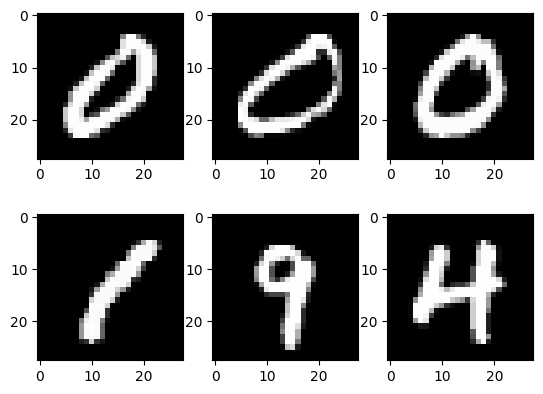

In [7]:
device = torch.device('cpu') #torch.device('cuda' if torch.cuda.is_available else 'cpu')

# hyper parameters
input_size = 784 # 28x28 pic
hidden_size = 100
num_classes = 10 # digtest 0 to 9
num_epoch = 2
batch_size = 100
learning_rate = 0.001

#MNIST
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

examples = iter(train_loader)
samples, labels = examples.next()
print(samples.shape, labels.shape)

for i in range(6):
  plt.subplot(2, 3, i+1)
  plt.imshow(samples[i][0], cmap='gray')
# plt.show()

class NeuralNet(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
    super(NeuralNet, self).__init__()
    self.l1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.l2 = nn.Linear(hidden_size, num_classes)
  
  def forward(self, x):
    out = self.l1(x)
    out = self.relu(out)
    out = self.l2(out)
    return out
  
model = NeuralNet(input_size, hidden_size, num_classes)

# loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# training loop
n_total_steps = len(train_loader)
for epoch in range(num_epoch):
  for i, (img, labels) in enumerate(train_loader):
    # 100, 1, 28, 28
    # 100, 784
    img = img.reshape(-1, 28*28).to(device)
    labels = labels.to(device)

    #forward
    output = model(img)
    loss = criterion(output, labels)

    #backward
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (i) % 100 == 0:
      print(f'epoch {epoch} / {num_epoch}, step {i}/{n_total_steps} loss = {loss.item():.4f}')

# test
with torch.no_grad():
  n_correct = 0
  n_samples = 0
  for img, labels in test_loader:
    img = img.reshape(-1, 28*28).to(device)
    labels = labels.to(device)
    output = model(img)

    # value, index (index er class label)
    _, predictions = torch.max(output, 1)
    n_samples += labels.shape[0]
    n_correct += (predictions == labels).sum().item()

  acc = 100.0 * n_correct / n_samples
  print(f'acc = {acc}')


<h1>PyTorch Tutorial 14 - Convolutional Neural Network (CNN)</h1>

In [ ]:
# Device configuration
device = torch.device('cpu') #torch.device('cuda' if torch.cuda.is_available else 'cpu')

# Hyper-parameters 
num_epochs = 5
batch_size = 4
learning_rate = 0.001

# dataset has PILImage images of range [0, 1]. 
# We transform them to Tensors of normalized range [-1, 1]
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# CIFAR10: 60000 32x32 color images in 10 classes, with 6000 images per class
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size,
                                          shuffle=True)

test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size,
                                         shuffle=False)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5) # 3 because the are 3 colorchannels
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # -> n, 3, 32, 32
        x = self.pool(F.relu(self.conv1(x)))  # -> n, 6, 14, 14
        x = self.pool(F.relu(self.conv2(x)))  # -> n, 16, 5, 5
        x = x.view(-1, 16 * 5 * 5)            # -> n, 400
        x = F.relu(self.fc1(x))               # -> n, 120
        x = F.relu(self.fc2(x))               # -> n, 84
        x = self.fc3(x)                       # -> n, 10
        return x

model = ConvNet().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # origin shape: [4, 3, 32, 32] = 4, 3, 1024
        # input_layer: 3 input channels, 6 output channels, 5 kernel size
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 2000 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

print('Finished Training')
PATH = './cnn.pth'
torch.save(model.state_dict(), PATH)

with torch.no_grad():
    n_correct = 0
    n_samples = 0
    n_class_correct = [0 for i in range(10)]
    n_class_samples = [0 for i in range(10)]
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()
        
        for i in range(batch_size):
            label = labels[i]
            pred = predicted[i]
            if (label == pred):
                n_class_correct[label] += 1
            n_class_samples[label] += 1

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network: {acc} %')

    for i in range(10):
        acc = 100.0 * n_class_correct[i] / n_class_samples[i]
        print(f'Accuracy of {classes[i]}: {acc} %')

100.0%


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Epoch [1/5], Step [2000/12500], Loss: 2.2849
Epoch [1/5], Step [4000/12500], Loss: 2.2677
Epoch [1/5], Step [6000/12500], Loss: 2.2341
Epoch [1/5], Step [8000/12500], Loss: 2.2668
Epoch [1/5], Step [10000/12500], Loss: 2.3231
Epoch [1/5], Step [12000/12500], Loss: 1.6277
Epoch [2/5], Step [2000/12500], Loss: 2.0229
Epoch [2/5], Step [4000/12500], Loss: 1.7986
Epoch [2/5], Step [6000/12500], Loss: 1.6878
Epoch [2/5], Step [8000/12500], Loss: 1.7350
Epoch [2/5], Step [10000/12500], Loss: 1.1807
Epoch [2/5], Step [12000/12500], Loss: 1.8516
Epoch [3/5], Step [2000/12500], Loss: 1.4325
Epoch [3/5], Step [4000/12500], Loss: 1.8096
Epoch [3/5], Step [6000/12500], Loss: 1.6112
Epoch [3/5], Step [8000/12500], Loss: 1.6113
Epoch [3/5], Step [10000/12500], Loss: 1.0544
Epoch [3/5], Step [12000/12500], Loss: 1.2439
Epoch [4/5], Step [2000/12500], Loss: 1.9567
Epoch [4/5], Step [4000/12500], Loss: 1.0605
Epoch